# Example of Hosmer-Lemeshow test

This is an example from the Wikipedia page on the Hosmer-Lemeshow test. "A researcher wishes to know if caffeine improves performance on a memory test. Volunteers consume different amounts of caffeine from 0 to 500 mg, and their score on the memory test is recorded."

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('HL_data.csv')
df

,group,caffeine,n_volunteers,A_grade,proportion_A
0,1,0,30,10,0.33
1,2,50,30,13,0.43
2,3,100,30,17,0.57
3,4,150,30,15,0.50
4,5,200,30,10,0.33
5,6,250,30,5,0.17
6,7,300,30,4,0.13
7,8,350,30,3,0.10
8,9,400,30,3,0.10
9,10,450,30,1,0.03


The table has the following columns.

- group: identifier for the 11 treatment groups, each receiving a different dose
- caffeine: mg of caffeine for volunteers in a treatment group
- n_volunteers: number of volunteers in a treatment group
- A_grade: the number of volunteers who achieved an A grade in the memory    test (success)
- proportion_A: the proportion of volunteers who achieved an A grade

## Logistic model of P(A grade) = f(caffeine)

Text(0, 0.5, 'Probability of grade A')

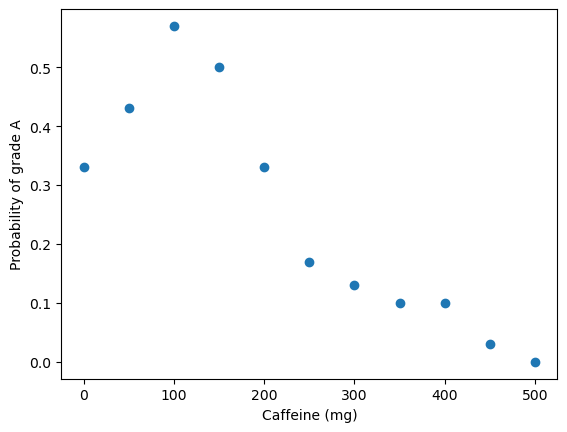

In [32]:
import matplotlib.pyplot as plt

X = df['caffeine'].to_numpy().reshape(-1,1)
y = df['proportion_A']
plt.figure()
plt.scatter(X,y)
plt.xlabel('Caffeine (mg)')
plt.ylabel('Probability of grade A')
 

The data are formatted in a way that cannot directly be used with sklearn (proportions instead of binary results), so we need some reformatting:

In [33]:
df

,group,caffeine,n_volunteers,A_grade,proportion_A
0,1,0,30,10,0.33
1,2,50,30,13,0.43
2,3,100,30,17,0.57
3,4,150,30,15,0.50
4,5,200,30,10,0.33
5,6,250,30,5,0.17
6,7,300,30,4,0.13
7,8,350,30,3,0.10
8,9,400,30,3,0.10
9,10,450,30,1,0.03


In [67]:
import numpy as np
Xf = np.array([])
yf = np.array([])
for i, row in df.iterrows():
    n = int(row['n_volunteers'])
    Xf = np.concatenate([Xf, row['caffeine']*np.ones(n)]) 
    nA = int(row['proportion_A']*n)
    yf = np.concatenate([yf, np.ones(nA)])
    yf = np.concatenate([yf, np.zeros(n-nA)])

In [87]:
idx = np.random.permutation(yf.size)
Xf = Xf[idx]
yf = yf[idx]

In [94]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression().fit(Xf.reshape(-1,1),yf)

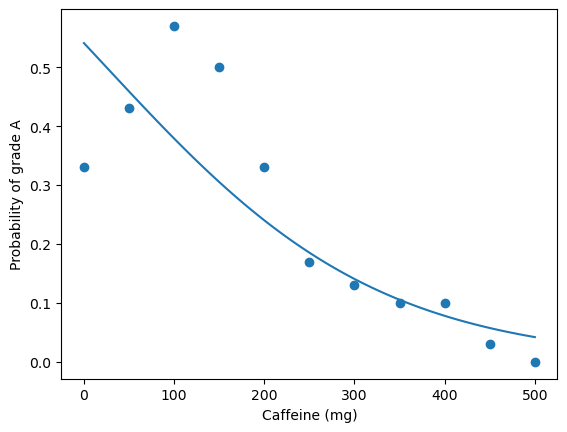

In [100]:
plt.figure()
plt.scatter(X,y)
plt.xlabel('Caffeine (mg)')
plt.ylabel('Probability of grade A')
xtest= np.linspace(0, 500, 100)
proba = lrm.predict_proba(xtest.reshape(-1,1))

plt.plot(xtest, proba[:,1])
plt.show()
 

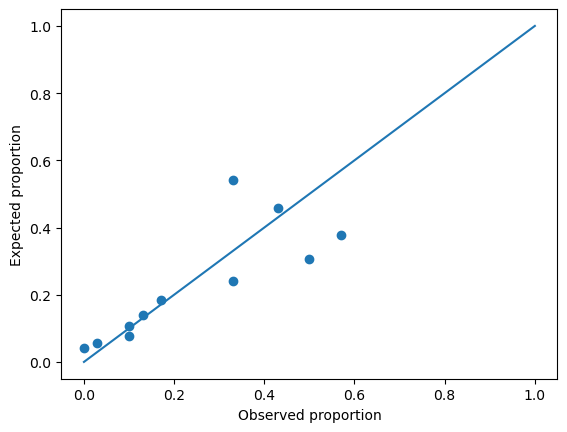

In [104]:
plt.figure()
proba = lrm.predict_proba(X)
 
plt.scatter(y,proba[:,1])
plt.plot(np.linspace(0,1,3),np.linspace(0,1,3))
plt.xlabel('Observed proportion')
plt.ylabel('Expected proportion')
 
 
plt.show()
 

"In this caffeine example, there are 30 observations for each dose, which makes calculation of the Pearson chi-squared statistic feasible. Unfortunately, it is common that there are not enough observations for each possible combinations of values of the x variables, so the Pearson chi-squared statistic cannot be readily calculated. A solution to this problem is the Hosmer-Lemeshow statistic. The key concept of the Hosmer-Lemeshow statistic is that, instead of observations being grouped by the values of the x variable(s), the observations are grouped by expected probability. That is, observations with similar expected probability are put into the same group, usually to create approximately 10 groups." (Source: Wikipedia)


The Hosmer–Lemeshow test can determine if the differences between observed and expected proportions are significant, indicating model lack of fit. 

The Hosmer-Lemeshow test statistic is given by:
$$
H=\sum_{g=1}^G\left(\frac{\left(O_{1 g}-E_{1 g}\right)^2}{E_{1 g}}+\frac{\left(O_{0 g}-E_{0 g}\right)^2}{E_{0 g}}\right)=\sum_{g=1}^G\left(\frac{\left(O_{1 g}-E_{1 g}\right)^2}{N_g \pi_g}+\frac{\left(N_g-O_{1 g}-\left(N_g-E_{1 g}\right)\right)^2}{N_g\left(1-\pi_g\right)}\right)=\sum_{g=1}^G \frac{\left(O_{1 g}-E_{1 g}\right)^2}{N_g \pi_g\left(1-\pi_g\right)} .
$$
Here $O_{1 g}, E_{1 g}, O_{0 g}, E_{0 g}, N_g$, and $\pi_g$ denote the observed $Y=1$ events, expected $Y=1$ events, observed $Y=0$ events, expected $Y=0$ events, total observations, predicted risk for the $g^{\text {th }}$ risk decile group, and $G$ is the number of groups. The test statistic asymptotically follows a $\chi^2$ distribution with $G-2$ degrees of freedom. The number of risk groups may be adjusted depending on how many fitted risks are determined by the model. This helps to avoid singular decile groups.